In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=23)

In [4]:
X.shape

(1000, 2)

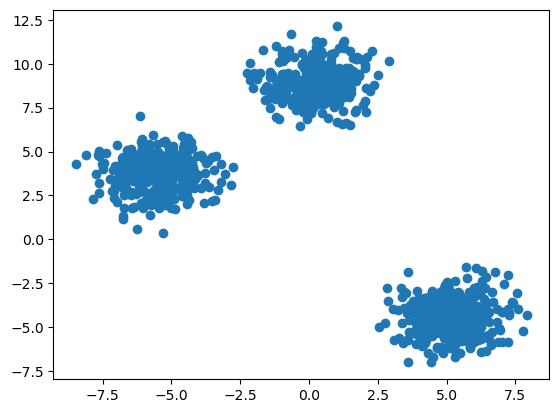

In [7]:
plt.scatter(X[:,0], X[:,1])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [9]:
from sklearn.cluster import KMeans

In [10]:
## Manual Process
## Elbow method to select the K value

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [11]:
wcss

[34827.576825520206,
 7935.437286145418,
 1319.273053158561,
 1140.4677884655127,
 992.6326991429295,
 853.9168697189742,
 762.6549357161136,
 668.6528104271886,
 579.35447082775,
 533.3176940583553]

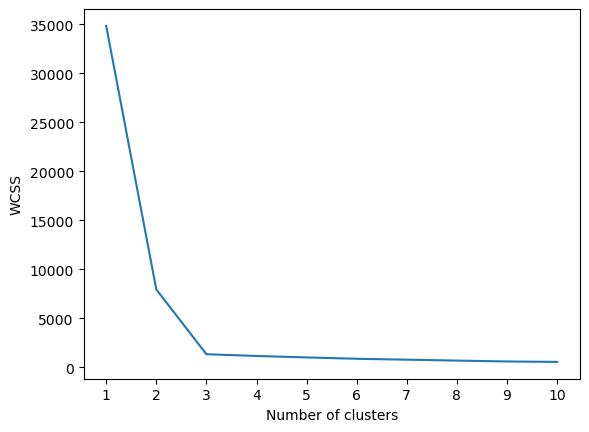

In [12]:
## Plot elbow curve
plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
## here k = 3 is good
kmeans = KMeans(n_clusters=3, init='k-means++')

In [15]:
y_labels = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
y_test_labels = kmeans.predict(X_test)

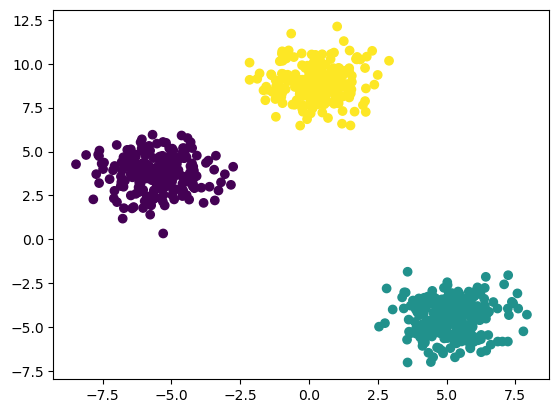

In [16]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)

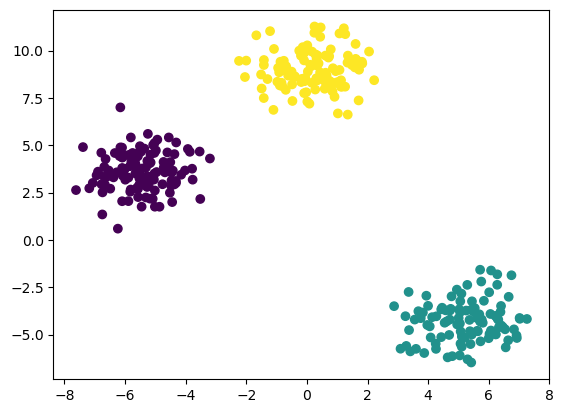

In [18]:
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_labels)

In [19]:
## Automatic Process
## Elbow method to select the K value
## Knee locator
!pip install kneed

In [20]:
from kneed import KneeLocator

In [21]:
kl = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
kl.elbow

3

In [22]:
## Performance metrics
## Silhoutte score
from sklearn.metrics import silhouette_score

In [24]:
silhoutte_cofficients=[]
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhoutte_cofficients.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [25]:
silhoutte_cofficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.33586652470708594,
 0.3338940736722017,
 0.34568939413246125,
 0.34535307190434644,
 0.33912434174846373]

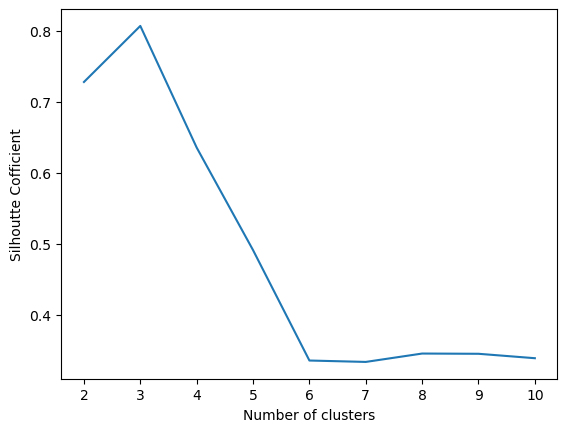

In [26]:
## Plot silhoutte score
plt.plot(range(2,11), silhoutte_cofficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte Cofficient')
plt.show()